# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Setting units to Celcius
units = "metric"

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint-joseph
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | margaret river
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | marovoay
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | ocean pointe
City not found. Skipping...
Processing Record 10 of Set 1 | porto velho
Processing Record 11 of Set 1 | wailua homesteads
Processing Record 12 of Set 1 | aasiaat
Processing Record 13 of Set 1 | kapuskasing
Processing Record 14 of Set 1 | keflavik
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | nkhotakota
Processing Record 17 of Set 1 | aykhal
Processing Record 18 of Set 1 | san marcos
Processing Record 19 of Set 1 | dul'durga
Processing Record 20 of Set 1 | taiohae
City not found. Skipping...
Processing Record 21 of Se

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saint-joseph,-21.3667,55.6167,25.21,92,98,6.65,RE,1706462127
1,punta arenas,-53.1500,-70.9167,16.06,51,75,12.35,CL,1706462075
2,margaret river,-33.9500,115.0667,13.24,78,71,4.07,AU,1706462256
3,bethel,41.3712,-73.4140,3.44,86,100,5.14,US,1706462257
4,port-aux-francais,-49.3500,70.2167,5.57,72,89,10.57,TF,1706462257


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint-joseph,-21.3667,55.6167,25.21,92,98,6.65,RE,1706462127
1,punta arenas,-53.1500,-70.9167,16.06,51,75,12.35,CL,1706462075
2,margaret river,-33.9500,115.0667,13.24,78,71,4.07,AU,1706462256
3,bethel,41.3712,-73.4140,3.44,86,100,5.14,US,1706462257
4,port-aux-francais,-49.3500,70.2167,5.57,72,89,10.57,TF,1706462257


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

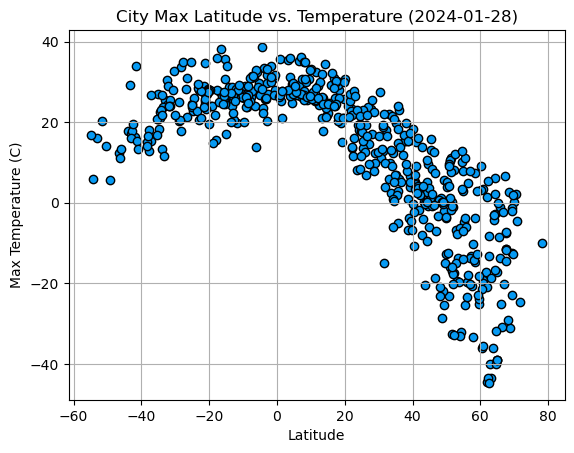

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", facecolors="#069AF3", edgecolors="black")

# Incorporate the other graph properties
# Used time function to convert Unix timestamp into yyyy-mm-dd format (https://docs.python.org/3/library/time.html)
plt.title(f"City Max Latitude vs. Temperature ({time.strftime('%Y-%m-%d', time.gmtime(city_data_df['Date'].max()))})")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

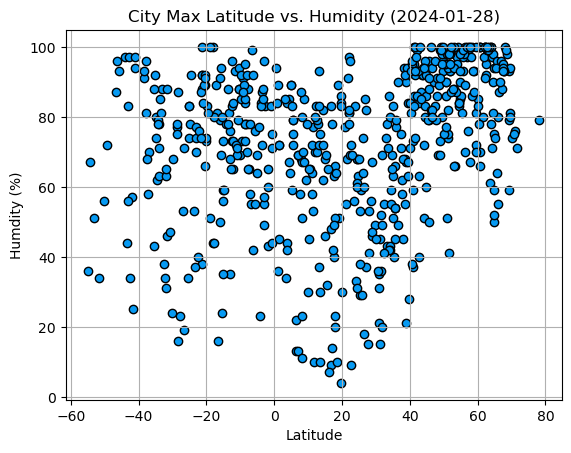

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", facecolors="#069AF3", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Humidity ({time.strftime('%Y-%m-%d', time.gmtime(city_data_df['Date'].max()))})")
plt.ylabel("Humdity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

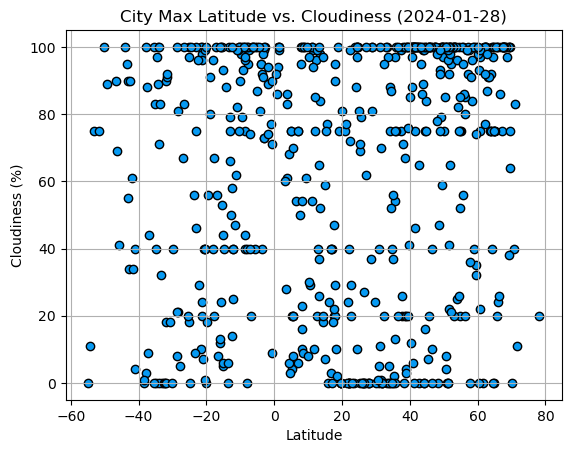

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", facecolors="#069AF3", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Cloudiness ({time.strftime('%Y-%m-%d', time.gmtime(city_data_df['Date'].max()))})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

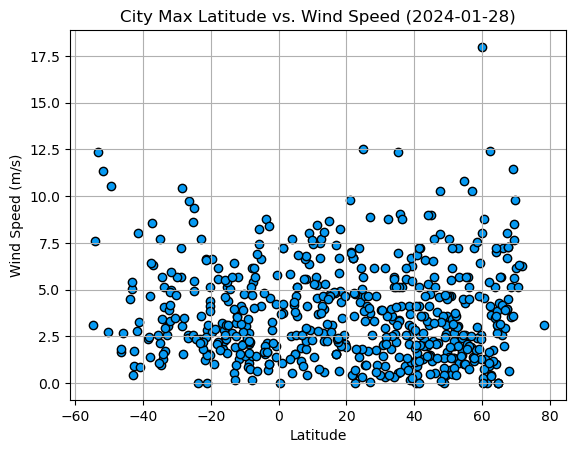

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", facecolors="#069AF3", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Wind Speed ({time.strftime('%Y-%m-%d', time.gmtime(city_data_df['Date'].max()))})")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [87]:
# Define a function to create Linear Regression plots
def lin_regress_plot(x, y, xlabel, ylabel, title, bestxloc, bestyloc):
    """
    Defining a function to create a scatter plot with the line of best fit and labels
    
    Parameters:
    - x: x-values list from dataframe
    - y: y-values list from dataframe
    - xlabel: label for x-axis
    - ylabel: label for y-axis
    - title: Title for chart
    - bestxloc - X axis variable to place best line fit equation into chart so not covered by points
    - bestyloc - Y axis variable to place best line fit equation into chart so not covered by points
    
    Function will also print r-value statement
    
    """
    # Linear Regression computation
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    # Defining line of best fit
    best_fit_line = slope * x + intercept
    
    # Printing r-value statement
    print(f"The r-value is: {r_value}")
    
    # Plotting scatter plot
    plt.scatter(x, y, marker="o", facecolors="#069AF3")
    
    # Plotting best fit line
    plt.plot(x, best_fit_line, color='red', linewidth=1)
    
    # Labeling chart and setting location of best fit line text
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.text(bestxloc, bestyloc,f'y = {round(slope,2)}x + {round(intercept,2)}',
             color='red', fontsize='x-large')
    
    # Display chart
    plt.show()    
    

In [98]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >=0]

text_date = time.strftime('%Y-%m-%d', time.gmtime(city_data_df['Date'].max()))

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,bethel,41.3712,-73.4140,3.44,86,100,5.14,US,1706462257
9,wailua homesteads,22.0669,-159.3780,22.44,81,0,6.69,US,1706462257
10,aasiaat,68.7098,-52.8699,-31.07,98,97,3.53,GL,1706462257
11,kapuskasing,49.4169,-82.4331,-1.95,80,100,3.09,CA,1706462258
12,keflavik,64.0049,-22.5624,-3.05,100,75,1.03,IS,1706462258


In [89]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint-joseph,-21.3667,55.6167,25.21,92,98,6.65,RE,1706462127
1,punta arenas,-53.1500,-70.9167,16.06,51,75,12.35,CL,1706462075
2,margaret river,-33.9500,115.0667,13.24,78,71,4.07,AU,1706462256
4,port-aux-francais,-49.3500,70.2167,5.57,72,89,10.57,TF,1706462257
5,marovoay,-16.1000,46.6333,25.54,79,12,2.84,MG,1706462257


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8313383665997756


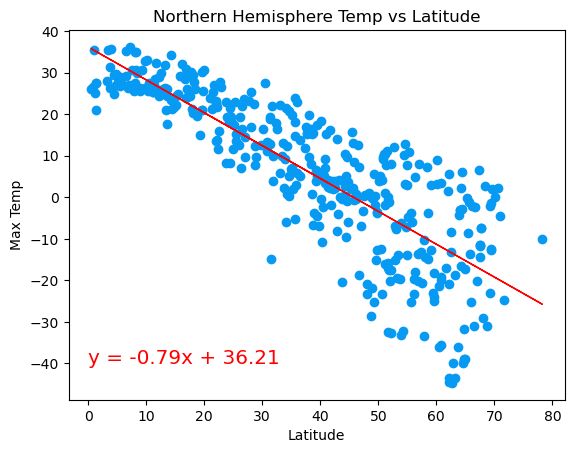

In [90]:
# Linear regression on Northern Hemisphere
lin_regress_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],"Latitude",
                 "Max Temp", "Northern Hemisphere Temp vs Latitude", 0, -40)

The r-value is: 0.5890866373722021


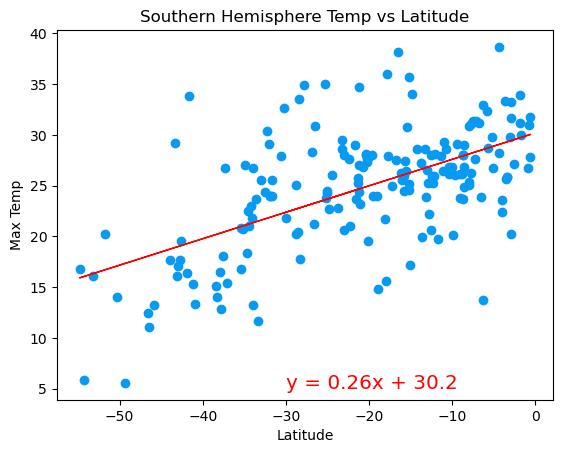

In [91]:
# Linear regression on Southern Hemisphere
lin_regress_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],"Latitude",
                 "Max Temp", "Southern Hemisphere Temp vs Latitude", -30, 5)

**Discussion about the linear relationship:**

Utilizing the dataset provided by the Open Weather API for the run date of January 28th, we observe a strong negative correlation (-0.8313) between maximum temperatures and latitude in the Northern Hemisphere. As latitude increases, temperatures decrease in the Northern Hemisphere.

Conversely, in the Southern Hemisphere, there is a positive correlation (0.5891) indicating a more moderate relationship between latitude and temperature. On this date, temperatures increase as latitude increases in the Southern Hemisphere, albeit to a lesser degree compared to the Northern Hemisphere.

In general, as we approach the equator, temperatures rise; conversely, as we move away from the equator towards the poles, temperatures drop.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4918151674911097


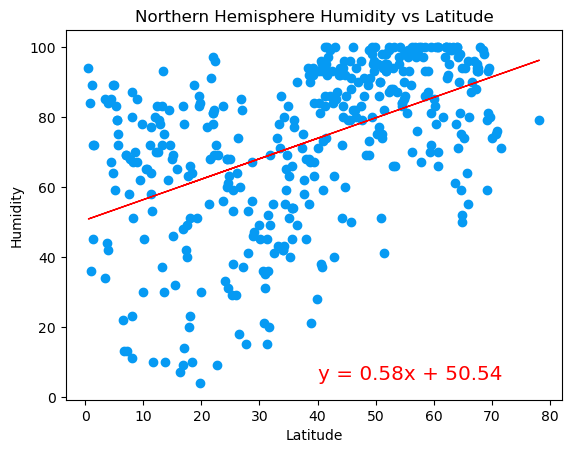

In [92]:
# Northern Hemisphere
lin_regress_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],"Latitude",
                 "Humidity", "Northern Hemisphere Humidity vs Latitude", 40, 5)

The r-value is: 0.11321608232451275


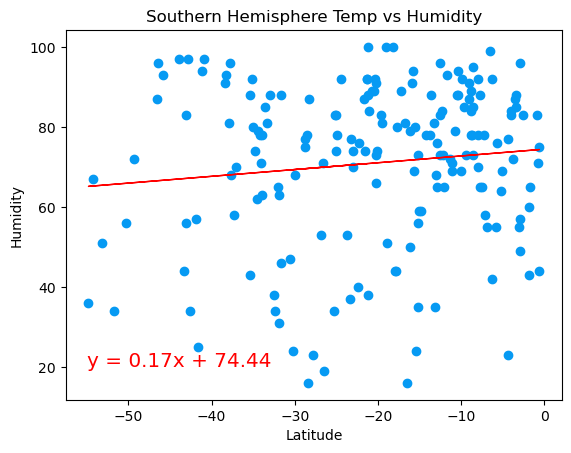

In [93]:
# Southern Hemisphere
lin_regress_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],"Latitude",
                 "Humidity", "Southern Hemisphere Temp vs Humidity", -55, 20)

**Discussion about the linear relationship:** 


When comparing humidity versus latitude for various cities surrounding the equator, we observe a positive correlation in both the Northern and Southern Hemispheres, with corresponding r-values of 0.4918 and 0.1132, respectively. However, these r-values suggest that the correlation is only moderate in the Northern Hemisphere and very weak in the Southern Hemisphere. Notably, in the Southern Hemisphere, the slope of the best-fit line is nearly flat, indicating minimal change in humidity with respect to a change in latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2491308747294908


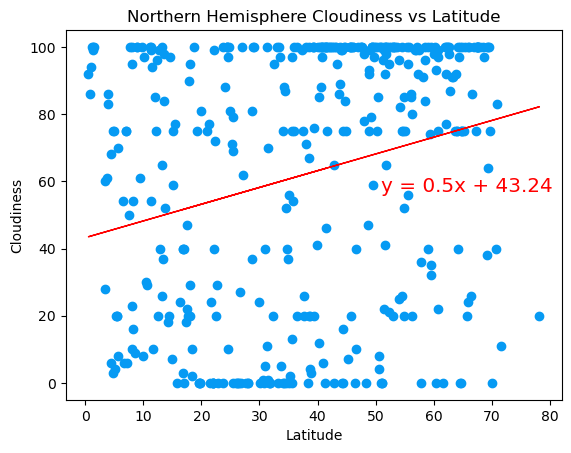

In [94]:
# Northern Hemisphere
lin_regress_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],"Latitude",
                 "Cloudiness", "Northern Hemisphere Cloudiness vs Latitude", 51, 57)

The r-value is: 0.24821632538980887


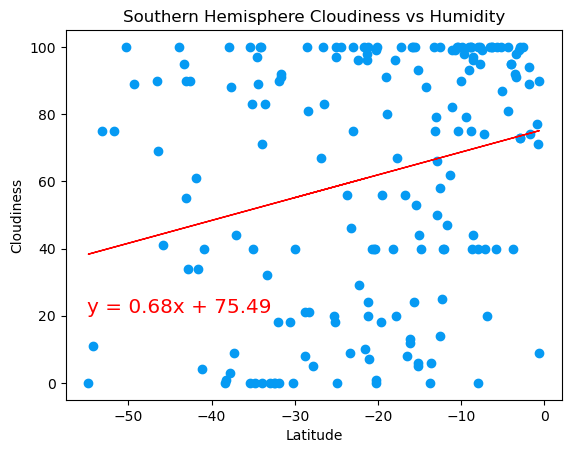

In [95]:
# Southern Hemisphere
lin_regress_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],"Latitude",
                 "Cloudiness", "Southern Hemisphere Cloudiness vs Humidity", -55, 21)

**Discussion about the linear relationship:** 

When comparing cloudiness versus latitude for various cities surrounding the equator, we observe a positive correlation in both the Northern and Southern Hemispheres, with corresponding r-values of 0.2491 and 0.2482, respectively. However, these r-values suggest that the correlation is weak in both hemispheres. Both charts exhibit similar slopes.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.01525293281161049


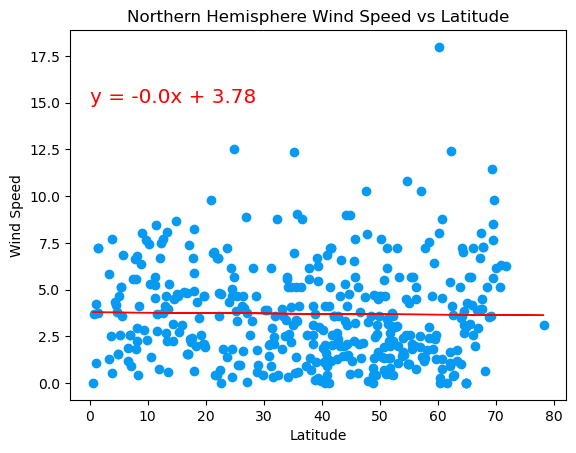

In [96]:
# Northern Hemisphere
lin_regress_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],"Latitude",
                 "Wind Speed", "Northern Hemisphere Wind Speed vs Latitude", 0, 15)

The r-value is: -0.19716795083794939


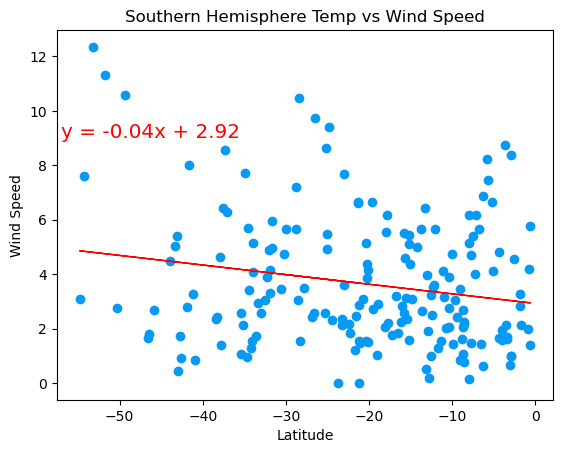

In [97]:
# Southern Hemisphere
lin_regress_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],"Latitude",
                 "Wind Speed", "Southern Hemisphere Wind Speed vs Latitude", -57, 9)

**Discussion about the linear relationship:** 

Comparing the relationship of wind speed and latitude in the Northern and Southern Hemispheres, the r-values for both are negative and very weak, -0.0153 and -0.1972, respectively.  With such weak r-values we can say there is little correlation between wind speed and distance from equator in both hemispheres.